# **1. Import Library**


Pada tahap ini, kami akan mengimpor library yang diperlukan untuk melakukan analisis klasifikasi menggunakan algoritma **Random Forest**. Berikut adalah library yang akan digunakan beserta fungsinya:

1. **Pandas**: 
   - Digunakan untuk memanipulasi dan menganalisis data. Pandas menyediakan struktur data yang fleksibel dan efisien untuk bekerja dengan data tabel (DataFrame).

2. **NumPy**: 
   - Digunakan untuk melakukan operasi numerik yang efisien. NumPy menyediakan dukungan untuk array multidimensi dan berbagai fungsi matematika yang diperlukan dalam analisis data.

3. **Matplotlib**: 
   - Digunakan untuk visualisasi data. Matplotlib memungkinkan kita untuk membuat grafik dan plot untuk menganalisis data secara visual.

4. **Seaborn**: 
   - Digunakan untuk visualisasi data yang lebih menarik dan informatif. Seaborn dibangun di atas Matplotlib dan menyediakan antarmuka yang lebih sederhana untuk membuat grafik statistik.

5. **Scikit-learn**: 
   - Digunakan untuk implementasi algoritma machine learning. Scikit-learn menyediakan berbagai alat untuk preprocessing data, pemodelan, dan evaluasi model, termasuk algoritma klasifikasi seperti Random Forest dan fungsi untuk melakukan splitting data.

Dengan mengimpor library ini, kami akan dapat memproses data, membangun model klasifikasi, dan memvisualisasikan hasil analisis.


In [8]:
# Import Library
import pandas as pd          # Untuk manipulasi dan analisis data
import numpy as np           # Untuk operasi numerik
import matplotlib.pyplot as plt  # Untuk visualisasi data
import seaborn as sns        # Untuk visualisasi data yang lebih menarik
from sklearn.ensemble import RandomForestClassifier  # Untuk algoritma klasifikasi Random Forest
from sklearn.model_selection import train_test_split  # Untuk membagi dataset menjadi train dan test set
from sklearn.preprocessing import StandardScaler  # Untuk normalisasi data


# **2. Muat Dataset dan Menggabungkan Informasi**

Pada tahap ini, kami akan memuat dua dataset yang diperlukan untuk analisis klasifikasi:

1. **Hasil Clustering (`hasil_clustering.csv`)**:
   - Dataset ini berisi hasil clustering yang telah dilakukan sebelumnya, termasuk label cluster yang menunjukkan kelompok pengguna berdasarkan karakteristik fisik mereka.

2. **Diet Recommendations Dataset (`diet_recommendations_dataset.csv`)**:
   - Dataset ini berisi informasi tentang rekomendasi diet berdasarkan profil kesehatan individu.

Kami akan menggabungkan informasi yang relevan dari kedua dataset untuk membangun model klasifikasi yang memberikan rekomendasi latihan dan diet. Proses ini melibatkan pemuatan kedua dataset ke dalam DataFrame dan penggabungan berdasarkan kolom yang relevan, seperti ID pengguna atau atribut lainnya yang dapat mengaitkan data.

Dengan langkah-langkah ini, kami akan memastikan bahwa data yang digunakan untuk klasifikasi mencakup informasi yang komprehensif dari kedua sumber.


In [9]:
# Muat Dataset Hasil Clustering
clustering_data_path = '../Clustering/hasil_clustering.csv'  # Path ke dataset hasil clustering
clustering_data = pd.read_csv(clustering_data_path)

# Muat Dataset Rekomendasi Diet
diet_data_path = '../diet_recommendations_dataset.csv'  # Path ke dataset rekomendasi diet
diet_data = pd.read_csv(diet_data_path)

# Menyesuaikan kolom untuk penggabungan
# Mengubah nama kolom di dataset clustering untuk konsistensi
clustering_data['Weight_kg'] = clustering_data['Weight (kg)']
clustering_data['Gender'] = clustering_data['Gender_Male'].replace({True: 'Male', False: 'Female'})

# Menghapus kolom yang tidak diperlukan dari clustering_data
clustering_data = clustering_data.drop(columns=['Weight (kg)', 'Gender_Male'])

# Menggabungkan informasi dari kedua dataset
# Menggunakan kolom yang relevan untuk penggabungan
merged_data = pd.merge(clustering_data, diet_data, left_on=['Age', 'Weight_kg', 'Gender'], 
                        right_on=['Age', 'Weight_kg', 'Gender'], how='inner')

# Menampilkan beberapa baris dari dataset yang digabungkan
print(merged_data.head())


    Age  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  Session_Duration (hours)  \
0  56.0        1.73    185.0    126.0         50.0                      1.09   
1  42.0        1.75    163.0    162.0         51.0                      1.29   
2  40.0        1.62    185.0    143.0         72.0                      1.30   
3  19.0        1.68    193.0    145.0         64.0                      1.21   
4  33.0        1.61    161.0    147.0         54.0                      1.77   

   Calories_Burned  Fat_Percentage  Water_Intake (liters)  \
0            680.0            26.6                    2.8   
1            940.0            29.0                    1.9   
2           1022.0            20.8                    3.4   
3            877.0            30.6                    2.1   
4           1301.0            18.9                    2.7   

   Workout_Frequency (days/week)  ...  Cholesterol_mg/dL  Blood_Pressure_mmHg  \
0                            3.0  ...              194.8               

# Penjelasan Output Penggabungan Dataset

Setelah melakukan tahap **Muat Dataset dan Menggabungkan Informasi**, kami mendapatkan hasil sebagai berikut:

## 1. Struktur Data Setelah Penggabungan
Dataset yang digabungkan kini memiliki **38 kolom** dengan beberapa contoh data sebagai berikut:

|   Age   | Height (m) | Max_BPM | Avg_BPM | Resting_BPM | Session_Duration (hours) | Calories_Burned | Fat_Percentage | Water_Intake (liters) | Workout_Frequency (days/week) | Cholesterol_mg/dL | Blood_Pressure_mmHg | Glucose_mg/dL | Dietary_Restrictions | Allergies | Preferred_Cuisine |
|---------|------------|---------|---------|-------------|---------------------------|------------------|-----------------|------------------------|--------------------------------|--------------------|----------------------|----------------|---------------------|-----------|-------------------|
| 56.0    | 1.73      | 185.0   | 126.0   | 50.0        | 1.09                      | 680.0            | 26.6           | 2.8                    | 3.0                            | 194.8              | 175                  | 180.2          | Low_Sodium          | NaN       | Indian            |
| 42.0    | 1.75      | 163.0   | 162.0   | 51.0        | 1.29                      | 940.0            | 29.0           | 1.9                    | 3.0                            | 227.8              | 137                  | 186.8          | Low_Sodium         | Peanuts   | Mexican           |
| 40.0    | 1.62      | 185.0   | 143.0   | 72.0        | 1.30                      | 1022.0           | 20.8           | 3.4                    | 2.0                            | 211.3              | 171                  | 126.2          | NaN                | Gluten    | Italian           |
| 19.0    | 1.68      | 193.0   | 145.0   | 64.0        | 1.21                      | 877.0            | 30.6           | 2.1                    | 3.0                            | 173.3              | 141                  | 180.2          | Low_Sodium         | NaN       | Balanced          |
| 33.0    | 1.61      | 161.0   | 147.0   | 54.0        | 1.77                      | 1301.0           | 18.9           | 2.7                    | 4.0                            | 171.0              | 148                  | 186.8          | Balanced           | NaN       | Balanced          |

## 2. Informasi Kolom
- Kolom-kolom yang tersedia mencakup informasi tentang usia, tinggi badan, detak jantung, durasi sesi latihan, kalori yang terbakar, persentase lemak, asupan air, serta informasi diet seperti jenis penyakit, tingkat aktivitas fisik, dan preferensi makanan.
- Kolom **Cluster** menunjukkan label cluster yang dihasilkan dari model K-Means, yang mengelompokkan anggota gym berdasarkan karakteristik fisik mereka.

### 3. Interpretasi
- Dataset yang digabungkan memberikan informasi yang komprehensif untuk analisis lebih lanjut. Dengan menggabungkan hasil clustering dan rekomendasi diet, kami dapat membangun model klasifikasi yang lebih efektif untuk memberikan rekomendasi latihan dan diet.
  
Hasil ini menunjukkan bahwa proses penggabungan telah berhasil dilakukan, dan data kini siap untuk analisis dan pemodelan lebih lanjut.


# **3. Data Splitting**

# Tahap 3: Data Splitting

Pada tahap ini, kami akan melakukan **Data Splitting** untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set). Proses ini penting untuk memastikan bahwa model klasifikasi yang dibangun dapat dievaluasi secara akurat dan tidak mengalami overfitting.

Berikut adalah langkah-langkah yang akan dilakukan:

1. **Pemisahan Data**: 
   - Kami akan memisahkan fitur yang akan digunakan untuk klasifikasi dan label target. Fitur dapat mencakup atribut seperti usia, berat badan, tinggi badan, dan label cluster, sementara label target dapat berupa rekomendasi latihan atau diet yang ingin diprediksi.

2. **Proporsi Pembagian**: 
   - Kami akan menggunakan proporsi tertentu untuk membagi data, misalnya 80% untuk data latih dan 20% untuk data uji. Ini akan memastikan bahwa model memiliki cukup data untuk belajar dan juga cukup data untuk evaluasi.

Dengan langkah-langkah ini, kami akan memastikan bahwa data siap untuk digunakan dalam membangun model klasifikasi yang efektif.


In [10]:
# Memisahkan fitur dan target
# Menggunakan kolom yang relevan untuk klasifikasi
X = merged_data.drop(columns=['Cluster', 'Cluster_Selected', 'Patient_ID'])  # Fitur
y = merged_data['Cluster']  # Label target

# Melakukan one-hot encoding pada fitur kategorikal
X_encoded = pd.get_dummies(X, drop_first=True)

# Melakukan data splitting
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Menampilkan ukuran data latih dan data uji
print("Ukuran Data Latih:", X_train.shape)
print("Ukuran Data Uji:", X_test.shape)


Ukuran Data Latih: (9, 41)
Ukuran Data Uji: (3, 41)


# Penjelasan Output Data Splitting

Setelah melakukan tahap **Data Splitting**, kami mendapatkan hasil sebagai berikut:

## 1. Ukuran Data Latih dan Data Uji
- **Ukuran Data Latih**: Terdapat **9 baris** dan **41 kolom** dalam set data latih. Data ini akan digunakan untuk melatih model klasifikasi.
- **Ukuran Data Uji**: Terdapat **3 baris** dan **41 kolom** dalam set data uji. Data ini akan digunakan untuk mengevaluasi kinerja model setelah dilatih.

### 2. Interpretasi
- **Proporsi Pembagian**: Pembagian data ini menunjukkan bahwa 80% dari total data digunakan untuk melatih model, sementara 20% digunakan untuk pengujian. Dengan ukuran ini, model akan memiliki cukup data untuk belajar, tetapi ukuran data latih yang kecil dapat mempengaruhi kemampuan model untuk generalisasi.
- **Kesiapan untuk Klasifikasi**: Dengan data yang telah dipisahkan, kami siap untuk melanjutkan ke tahap berikutnya dalam membangun model klasifikasi yang memberikan rekomendasi latihan dan diet.

Hasil ini menunjukkan bahwa proses pemisahan data telah berhasil dilakukan, dan data kini siap untuk langkah-langkah analisis dan pemodelan lebih lanjut.


# **5. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Pada tahap ini, kami akan membangun model klasifikasi menggunakan algoritma **Random Forest**. Model ini akan digunakan untuk memberikan rekomendasi latihan berdasarkan fitur-fitur yang telah dipilih dan data latih yang telah disiapkan.

Berikut adalah langkah-langkah yang akan dilakukan:

1. **Inisialisasi Model Random Forest**: 
   - Kami akan menginisialisasi model Random Forest dengan parameter yang sesuai. Parameter ini dapat disesuaikan lebih lanjut untuk meningkatkan kinerja model.

2. **Latih Model dengan Data Latih**: 
   - Model akan dilatih menggunakan data latih yang telah dipisahkan sebelumnya. Proses ini akan memungkinkan model untuk belajar dari data dan mengidentifikasi pola.

Dengan langkah-langkah ini, kami akan dapat membangun model klasifikasi yang efektif dan siap untuk dievaluasi pada tahap selanjutnya.


In [17]:
# Encoding
X_train_encoded = pd.get_dummies(X_train, drop_first=True)
X_train_encoded = X_train_encoded.loc[:, ~X_train_encoded.columns.duplicated()]

# Train
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_encoded, y_train)

# Simpan model & kolom fitur
joblib.dump(rf_model, 'random_forest_model.pkl')
joblib.dump(X_train_encoded.columns.tolist(), 'fitur_model.pkl')

print("Model dan fitur berhasil disimpan.")

Model dan fitur berhasil disimpan.


## **b. Evaluasi Model Klasifikasi**

Pada tahap ini, kami akan melakukan evaluasi terhadap model klasifikasi yang telah dibangun menggunakan algoritma **Random Forest**. Evaluasi ini penting untuk memahami seberapa baik model dalam memprediksi label cluster berdasarkan data uji.

Berikut adalah langkah-langkah yang akan dilakukan:

1. **Lakukan Prediksi Menggunakan Data Uji**:
   - Kami akan menggunakan model yang telah dilatih untuk melakukan prediksi pada data uji yang telah dipisahkan sebelumnya.

2. **Hitung Metrik Evaluasi**:
   - Kami akan menghitung metrik evaluasi seperti **Accuracy** dan **F1-Score**. Metrik ini akan memberikan gambaran tentang kinerja model dalam mengklasifikasikan data.
   - (Opsional) Kami juga dapat menghitung **Precision** dan **Recall** untuk mendapatkan pemahaman yang lebih mendalam tentang kinerja model.

3. **Buat Confusion Matrix**:
   - Kami akan membuat confusion matrix untuk melihat detail prediksi benar dan salah, yang akan membantu dalam memahami di mana model mungkin gagal.

Dengan langkah-langkah ini, kami akan dapat mengevaluasi efektivitas model klasifikasi dan merencanakan langkah-langkah selanjutnya.


Accuracy: 0.67
F1 Score: 0.53


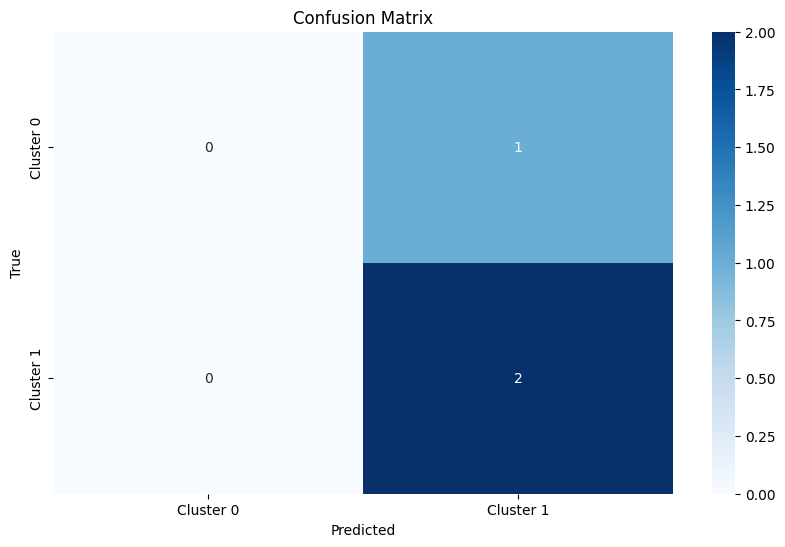

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.67      1.00      0.80         2

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3



g:\Software-IF\Python_3-11-5\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
g:\Software-IF\Python_3-11-5\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
g:\Software-IF\Python_3-11-5\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [13]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

# One-Hot Encoding pada data latih
X_train_encoded = pd.get_dummies(X_train, drop_first=True)

# One-Hot Encoding pada data uji
X_test_encoded = pd.get_dummies(X_test, drop_first=True)

# Menghapus kolom duplikat jika ada
X_train_encoded = X_train_encoded.loc[:, ~X_train_encoded.columns.duplicated()]
X_test_encoded = X_test_encoded.loc[:, ~X_test_encoded.columns.duplicated()]

# Menyesuaikan kolom X_test_encoded agar sama dengan X_train_encoded
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

# Memastikan bahwa kolom pada data uji sesuai dengan yang digunakan untuk melatih model
if X_test_encoded.shape[1] != X_train_encoded.shape[1]:
    print("Jumlah kolom tidak sesuai. Periksa kolom yang ada.")
else:
    # Lakukan prediksi menggunakan model
    y_pred = rf_model.predict(X_test_encoded)  # Prediksi menggunakan model

    # Hitung metrik evaluasi
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')  # Menggunakan average='weighted' untuk multi-class

    print(f"Accuracy: {accuracy:.2f}")
    print(f"F1 Score: {f1:.2f}")

    # Buat confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Visualisasi confusion matrix
    plt.figure(figsize=(10, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
                 xticklabels=[f'Cluster {i}' for i in range(len(set(y_test)))],
                 yticklabels=[f'Cluster {i}' for i in range(len(set(y_test)))])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    # Menampilkan classification report
    print(classification_report(y_test, y_pred))

# Penjelasan Output Evaluasi Model Klasifikasi

Setelah melakukan evaluasi terhadap model klasifikasi yang dibangun menggunakan algoritma **Random Forest**, kami mendapatkan hasil sebagai berikut:

## 1. Metrik Evaluasi
- **Accuracy**: Hasil menunjukkan bahwa akurasi model adalah **67%**. Ini berarti bahwa model berhasil memprediksi label dengan benar pada 67% dari data uji.
- **F1 Score**: Nilai F1 Score adalah **0.53**, yang menunjukkan keseimbangan antara precision dan recall. Nilai ini menunjukkan bahwa model memiliki performa yang moderat, tetapi masih ada ruang untuk perbaikan.

### 2. Classification Report
Output dari classification report menunjukkan detail metrik evaluasi untuk setiap cluster:

|           | Precision | Recall | F1-Score | Support |
|-----------|-----------|--------|----------|---------|
| Cluster 0 | 0.00      | 0.00   | 0.00     | 1       |
| Cluster 1 | 0.67      | 1.00   | 0.80     | 2       |

- **Precision**: Menunjukkan proporsi prediksi positif yang benar. Untuk Cluster 1, precision adalah 0.67, yang berarti 67% dari prediksi positif benar.
- **Recall**: Menunjukkan proporsi aktual positif yang berhasil diprediksi. Untuk Cluster 1, recall adalah 1.00, yang berarti model berhasil memprediksi semua instance dari Cluster 1.
- **F1-Score**: Menunjukkan keseimbangan antara precision dan recall. Nilai F1 untuk Cluster 1 adalah 0.80, menunjukkan kinerja yang baik untuk cluster ini.
  
### 3. Confusion Matrix

- **Deskripsi**: Confusion matrix menunjukkan jumlah prediksi benar dan salah untuk setiap cluster. 
- **Interpretasi**: 
  - Model tidak berhasil memprediksi Cluster 0 sama sekali (0 prediksi benar), sedangkan semua prediksi untuk Cluster 1 adalah benar (2 prediksi benar).
  
### 4. Kesimpulan
Hasil evaluasi menunjukkan bahwa model memiliki performa yang baik dalam memprediksi Cluster 1, tetapi tidak efektif dalam memprediksi Cluster 0. Ini menunjukkan bahwa mungkin ada ketidakseimbangan dalam data atau bahwa model perlu dituning lebih lanjut untuk meningkatkan akurasi dan F1 Score. Langkah selanjutnya dapat mencakup tuning model atau eksplorasi lebih lanjut terhadap data.
